**<center><font size=6>CS490: Machine Learning<br>Homework 3</font></center>**

<hr>

# Part 1: Linear Regression (60 points)

For this problem we will fit linear regression models that minimize the *mean squared error* (MSE).

## Preparing the Data

Load the `data/curve80.txt` data set, and split it into 75% / 25% training/test. The first column is the scalar feature value x; the second column data[:,1] is the target value y for each example. For consistency in our results, ***do not reorder (shuffle)*** the data (they’re already in a random
order), and use the first 75% of the data for training and the rest for testing.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import mltools as ml

# TODO: Load your data into a matrix called data
data = np.genfromtxt("data/curve80.txt",delimiter=None)

# Set up training and test sets
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtrain,Xtest,Ytrain,Ytest = ml.splitData(X,Y,0.75) # split data set 75/25

**Print the shapes of these objects. <span style="color: deepskyblue;">(5 points)</span>**

Trianing shape: 60 60
Validation shape: 20 20


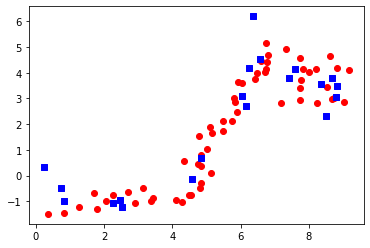

In [2]:
# TODO: Print the shapes of the training and validation data

print('Trianing shape:', Xtrain.shape[0], Ytrain.shape[0])
print('Validation shape:', Xtest.shape[0], Ytest.shape[0])
plt.scatter(Xtrain, Ytrain, color='red')
plt.scatter(Xtest, Ytest, color='blue', marker='s')
plt.show()


## Linear Regression Learning
Use the provided `linearRegress` class in `mltools` to create a linear regression predictor of y given x. You can plot the resulting function by simply evaluating the model at a large number of x values and plotting the resulting ys:

In [3]:
lr = ml.linear.linearRegress( Xtrain, Ytrain ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code) 
ys = lr.predict( xs ) # make predictions at xs

**Plot the training data points along with your prediction function in a single plot. <span style="color: deepskyblue;">(5 points)</span>**

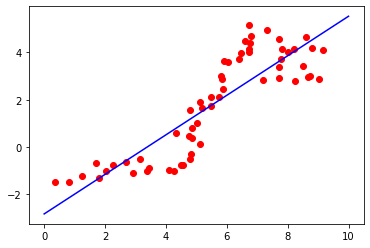

In [4]:
# TODO: plot of training data and prediction function

plt.scatter(Xtrain, Ytrain, color='red')
plt.plot(xs, ys, color='blue')

plt.show()


**Print the linear regression coefficients (`lr.theta`) and verify that they match your plot. <span style="color: deepskyblue;">(5 points)</span>**

In [130]:
# TODO: print out the regression parameters
theta = lr.theta
print("Theta matrix:", theta)  #Since there's only one feature matrix xs, theta is only a 2x1 matrix
y = theta[0][0] + theta[0][1]*xs[0] #Since the line is order 1 (linear), we only need to test one point because the slope is constant

if (y == ys[0]):
    print("Confirmed!")
else:
    print("This is wrong...")

Theta matrix: [[-2.82765049  0.83606916]]
Confirmed!


**What is the mean squared error of the predictions on the training and test data? Fill in the function below and use to it compute the MSE.  <span style="color: deepskyblue;">(15 points)</span>**

In [131]:
# Function to compute the MSE
def MSE(y_true, y_hat):
        y_hat = y_hat.T
        error = (y_true - y_hat)
        error = np.square(error)
        error = (1/y_true.shape[0])*error.sum()
        return error
# Use this function to compute MSE
ys = lr.predict(Xtrain)
print("MSE (Train) = ", MSE(Ytrain,ys))

ys = lr.predict(Xtest)
print("MSE (Test)  = ", MSE(Ytest,ys))

MSE (Train) =  1.127711955609391
MSE (Test)  =  2.242349203010125


You can check your previous answer by using the built-in `mse` function in `mltools`.

In [132]:
print("MSE (Train) = ", lr.mse(Xtrain,Ytrain))
print("MSE (Test)  = ", lr.mse(Xtest,Ytest))

MSE (Train) =  1.127711955609391
MSE (Test)  =  2.242349203010125


<hr>

## Regression with Higher Degree Polynomials
Try fitting y = f(x) using a polynomial function f(x) of increasing order. Do this by the trick of adding additional polynomial features before constructing and training the linear regression object. You can do this easily yourself; you can add a quadratic feature of `Xtrain` with:

In [133]:
Xtrain2 = np.zeros( (Xtrain.shape[0],2) ) # create Mx2 array to store features 
Xtrain2[:,0] = Xtrain[:,0]                # place original "x" feature as X1
Xtrain2[:,1] = Xtrain[:,0]**2             # place "x^2" feature as X2
# Now, Xtrain2 has two features about each data point: "x" and "x^2"

(You can also add the all-ones constant feature in a similar way, but this is currently done automatically within the learner’s train function.) A function `ml.transforms.fpoly` is also provided to more easily create such features. Note, though, that the resulting features may include extremely large values; if x ≈ 10, then x^10 is extremely large. For this reason (as is often the case with features on very different scales) it’s a good idea to **rescale the features**, that is to make sure that the range (the min and the max) and the variance (the spread) are similar across all the features. You can do this manually by computing multipliers for each variable to regularize their values (see https://en.wikipedia.org/wiki/Feature_scaling for some methods) or use the provided function in mltools:

In [134]:
# Create polynomial features up to "degree"; don't create constant feature
# (the linear regression learner will add the constant feature automatically) 
# XtrainP = ml.transforms.fpoly(Xtrain, degree, bias=False)

# Rescale the data matrix so that the features have similar ranges / variance
# XtrainP,params = ml.transforms.rescale(XtrainP)

# "params" returns the transformation parameters (shift & scale)
# Then we can train the model on the scaled feature matrix:
# lr = ml.linear.linearRegress( XtrainP, Ytrain ) # create and train model

# Now, apply the same polynomial expansion & scaling transformation to Xtest:
# XtestP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xtest,degree,false), params)

The transformations used to create features of the training data may depend on properties of that data (such as rescaling the data to have mean zero and variance one). For our learned predictions to be consistent, we need to apply the same transform to new test data, so that it will be represented consistently with the training data. “Feature transform” functions like `rescale` are written to output their parameters (here `params = (mu,sig)`,a tuple containing the mean and standard deviation used to shift and scale the data) so that they can be reused on subsequent data. When evaluating a polynomial regression model, be sure that the same rescaling and polynomial expansion is applied to both the training and test data.

**Train polynomial regression models of degree d = 1, 3, 5, 7, 10, 15, 18, and:**

**(a) For each model, plot the learned prediction function f(x).  <span style="color: deepskyblue;">(15 points)</span>**

**(b) Plot the training and test errors on a log scale ( semilogy ) as a function of the model degree.  <span style="color: deepskyblue;">(10 points)</span>**

**(c) What polynomial degree do you recommend?  <span style="color: deepskyblue;">(5 points)</span>**

When plotting prediction functions in part (a), you should set all plots to have the same vertical axis limits as the d = 1 regression model. Otherwise, high-degree polynomials may appear flat due to taking on extremely large values for a subset of inputs. Here is some example code:

In [34]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 8)) Create axes for single subplot 
#ax.plot(...) # Plot polynomial regression of desired degree
#ax.set_ylim(..., ...) # Set the minimum and maximum limits
#plt.show()

Degree: 1
Predicted Functions (train (green), test (orange)):


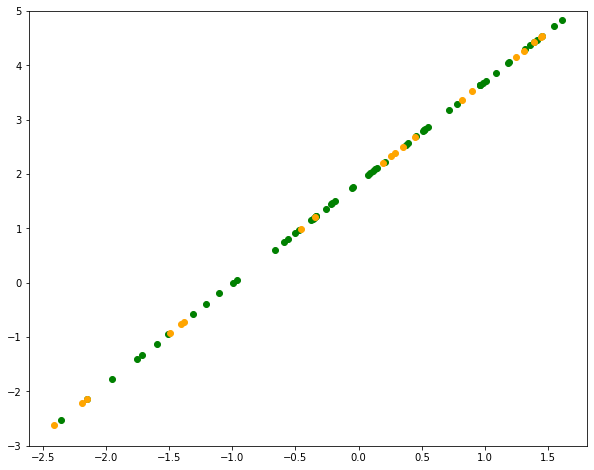

Degree: 3
Predicted Functions (train (green), test (orange)):


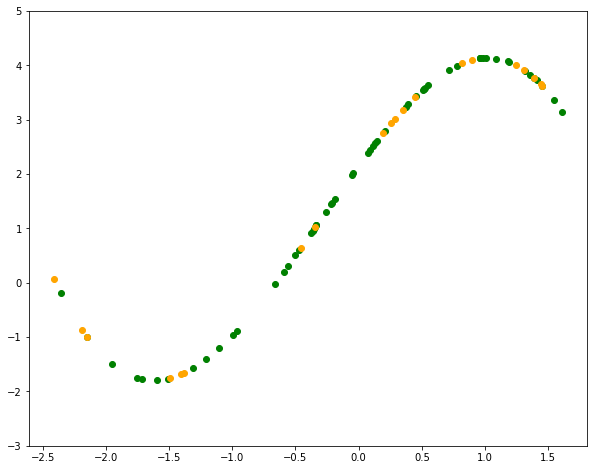

Degree: 5
Predicted Functions (train (green), test (orange)):


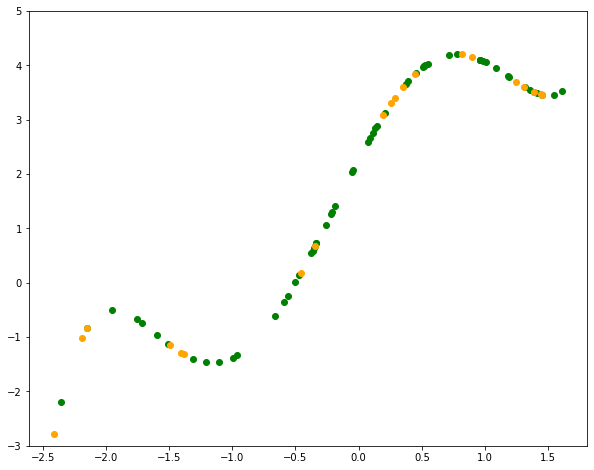

Degree: 7
Predicted Functions (train (green), test (orange)):


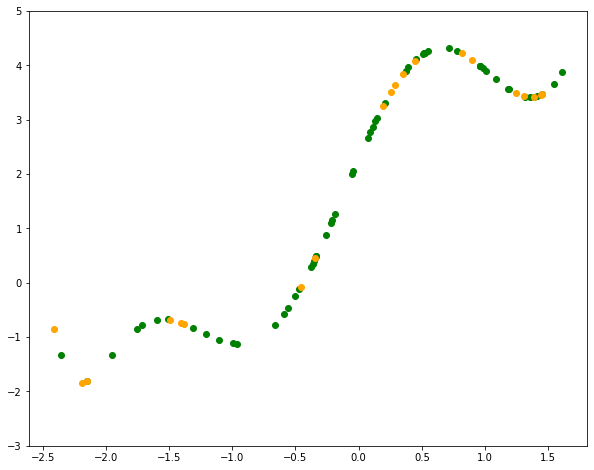

Degree: 10
Predicted Functions (train (green), test (orange)):


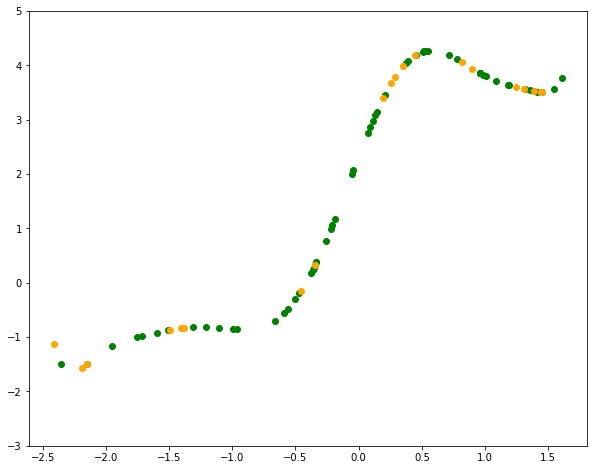

Degree: 15
Predicted Functions (train (green), test (orange)):


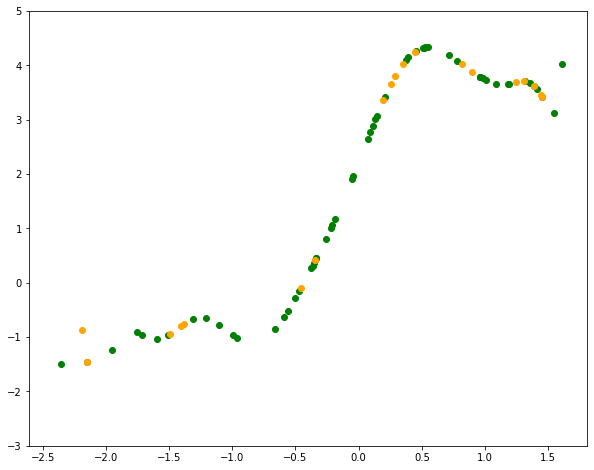

Degree: 18
Predicted Functions (train (green), test (orange)):


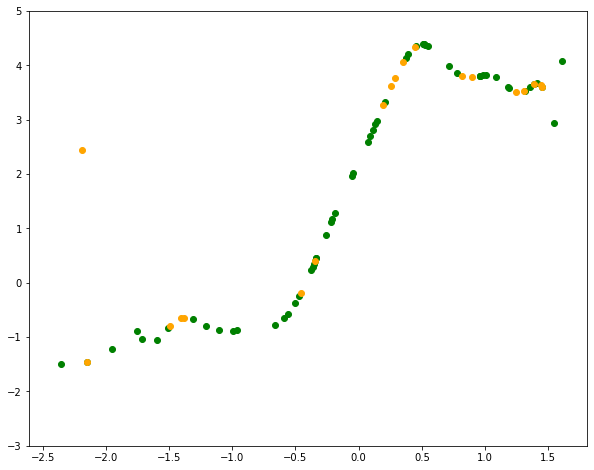

Error Functions (train (red), test (green)):


C:\Users\eleme\AppData\Local\Temp\ipykernel_18248\4171675457.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  bx.set_ylim([0, 10**1])


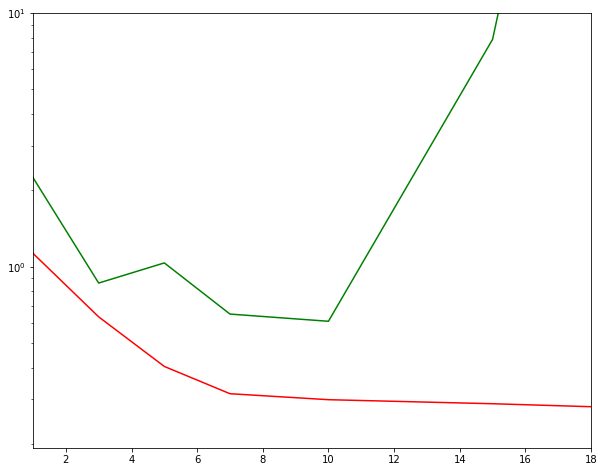

In [159]:
# TODO: Train and plot polynomials for d = 1, 3, 5, 7, 10, 15, 18
degrees = [1, 3, 5, 7, 10, 15, 18]
mseTrain = []
mseTest = []

for degree in degrees:
    # add extra points to training data as a function f(x) = x^degree
    XtrainP = ml.transforms.fpoly(Xtrain, degree, bias=False)
    XtrainP,params = ml.transforms.rescale(XtrainP)
    # train a model based on the Xtrain and the corresponding Ytrain values
    lr = ml.linear.linearRegress( XtrainP, Ytrain )
    # see what the model predicts for the Y values
    YtrainPredict = lr.predict(XtrainP)
    # perform the same operation on the test data
    XtestP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xtest,degree,bias=False), params)
    YtestPredict = lr.predict(XtestP)
    
    print("Degree:", degree)
    # plot the training and test predicted functions
    print("Predicted Functions (train (green), test (orange)):")
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.scatter(XtrainP[:,0], YtrainPredict, color='green')
    ax.set_ylim(-3, 5)
    ax.scatter(XtestP[:,0], YtestPredict, color='orange')
    ax.set_ylim(-3, 5)
    plt.show()
    
    # add training and test data MSE to plot later
    mseTrain.append(lr.mse(XtrainP, Ytrain))
    mseTest.append(lr.mse(XtestP, Ytest))
    
# plot the residual per point
fig, bx = plt.subplots(1, 1, figsize=(10, 8))
print("Error Functions (train (red), test (green)):")
bx.semilogy(degrees, mseTrain, color='red')
bx.semilogy(degrees, mseTest, color='green')
bx.set_xlim(1, 18)
bx.set_ylim([0, 10**1])
plt.show()
    
# It seems the law diminishing returns becomes evident the more the degree increases over degree 3.
# The error for training and test data diverges harshly around degree = 10.
# There is a smaller divergence around degree = 3 but this is due to lack of a smoother curve it seems.
# I filled in the degrees to see if I could get the curve smoother but there is still a small 
# divergence around degree = 3 that the errors then converge again after.  If I could get an actual function for the 
# MSE vs degree instead of data points I believe the true divergence would be somewhere between degrees 3 and 8.  
# So for the final answer, based on the data that I have at my disposal, degree 7 seems to be enough 
# complexity to accurately predict the test targets.


<hr>

## Extra Credit <span style="color: deepskyblue;">(10 points) </span>

Unlike our small example dataset, many machine learning problems must contend with large-scale data that cannot be efficiently handled by learning methods. Often, it is necessary to approximate the predictions of these learners. One common method for approximating the results of a complex learner is to compute  random Fourier features of the input data, essentially decomposing what might be a very complex dataset into a summation of simple sinusoidal functions which may make computations for the machine learning easier (for more information on Fourier transforms/series see http://www.thefouriertransform.com/). 

**Instead of expanding our data using polynomial features, try using Fourier features, i.e.,**


In [ ]:
XtrF = np.zeros( (Xtr.shape[0],5) ) # create Mx5 array to store features
XtrF[:,0] = Xtr[:,0] # place original "x" feature as X1
XtrF[:,1] = np.sin(Xtr[:,0]/2.) # place "sin(x)" feature as X2 (approx. scaled to X's range)
XtrF[:,2] = np.cos(Xtr[:,0]/2.) # place "cos(x)" feature as X3
XtrF[:,3] = np.sin(Xtr[:,0]*2./2.) # place "sin(2*x)" feature as X3
XtrF[:,4] = np.cos(Xtr[:,0]*2./2.) # place "cos(2*x)" feature as X4
# Now, XtrF has five features about each data point: "x" and four Fourier features

**Try expanding the number of Fourier features and plot the training and validation curves for this feature set. Plot your results, and discuss.**

In [ ]:
## TODO: Linear Regression with random Fourier features




<hr>

# Part 2: Cross-validation (40 points)

In the previous problem, you decided what degree of polynomial fit to use based on performance on some test data. Now suppose that you do not have access to the target values of the test data you held out in the previous problem and want to decide on the best polynomial degree.
One option would be to further split `Xtrain` into training and validation datasets and then assess performance on the validation data to choose the degree. But when training is reasonably efficient (or you have significant computational resources), it can be more effective to use cross-validation to estimate the optimal degree. Cross- validation works by creating many training/validation splits, called folds, and using all of these splits to assess the
“out-of-sample” (validation) performance by averaging them. You can do a 5-fold validation test, for example, by **(NOTE: this code is incomplete and won't run as is--you will be filling in the rest when you write your `totalMSE` function below.)**:

In [245]:
def foldFunction(foldsArr):
    degree = 5
    meanJtrain = []
    meanJval = []
    for nFold in foldsArr:
        Jtrain = [0 for i in range(nFolds)] # we can't index an empty array so we have to initialize with some values
        Jval = [0 for i in range(nFolds)] # do it again
        for iFold in range(nFolds):       # iterate over all of the folds
            Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtrain,Ytrain,nFolds,iFold) # use ith block as validation
            learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti, the data for this fold
            Jtrain[iFold], Jval[iFold] = totalMSE(degree, nFolds, Xti, Yti, Xvi, Yvi)# TODO: now compute the MSE on Xvi, Yvi and save it
            
        # the overall estimated validation error is the average of the error on each fold
        meanJtrain.append(np.mean(Jtrain))  # mean of the training error at specific degree
        meanJval.append(np.mean(Jval))      # mean of the validation error at specific degree
    print("This is the plot to part (e)")
    print("Error Functions (train (red), test (green)):")
    print("This plot is error as a function of the number of folds.")
    plotMSE(foldsArr, meanJtrain, meanJval)   # plotting function

# I didn't mean to have to make the same function twice but I accidentally produced all graphs as a function of degree
# for all number of folds.  To mitigate the time lost, I just copy pasted and formatted the function to accpet an array 
# with degree instead of folds.
def degreeFunction(degrees):
    nFolds = 5
    meanJtrain = []
    meanJval = []
    for degree in degrees:
        Jtrain = [0 for i in range(nFolds)] # we can't index an empty array so we have to initialize with some values
        Jval = [0 for i in range(nFolds)] # do it again
        for iFold in range(nFolds):       # iterate over all of the folds
            Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtrain,Ytrain,nFolds,iFold) # use ith block as validation
            learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti, the data for this fold
            Jtrain[iFold], Jval[iFold] = totalMSE(degree, nFolds, Xti, Yti, Xvi, Yvi)# TODO: now compute the MSE on Xvi, Yvi and save it
            
        # the overall estimated validation error is the average of the error on each fold
        meanJtrain.append(np.mean(Jtrain))  # mean of the training error at specific degree
        meanJval.append(np.mean(Jval))      # mean of the validation error at specific degree
    print("This is the plot to part (b)")    
    print("Error Functions (train (red), test (green)):")
    print("This plot is error as a function of degree.")
    plotMSE(degrees, meanJtrain, meanJval)   # plotting function

**Using this technique on your training data from the previous problem, find the 5-fold cross-validation MSE of linear regression at the same degrees as before, d = 1, 3, 5, 7, 10, 15, 18.**

**(a) To make your code more readable, write a function `totalMSE` that takes the degree and number of folds as arguments, and returns the cross-validation error. <span style="color: deepskyblue;">(5 points) </span>**

**(b) Plot the five-fold cross-validation error (with semilogy , as before) as a function of degree. <span style="color: deepskyblue;">(10 points)</span>**

In [246]:
# TODO: totalMSE(d, n) to assess a model of degree d using n-fold cross-validation
def totalMSE(d, n, Xti2, Yti2, Xvi2, Yvi2):
    XtrainPoly = ml.transforms.fpoly(Xti2, d, bias=False)  # create features up to our chosen degree
    XtrainPoly,params = ml.transforms.rescale(XtrainPoly)
    lr = ml.linear.linearRegress(XtrainPoly, Yti2)
    trainError = lr.mse(XtrainPoly,Yti2)   # training error calculated using the built in mse function
    
    XvalPoly,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi2,d,False), params)
    valError = lr.mse(XvalPoly,Yvi2)       # validation error calculated using the built in mse function
    error = (trainError, valError)
    return error

# TODO: Compute and plot the five-fold cross-validation error for d = 1, 3, 5, 7, 10, 15, 18
def plotMSE(folds, mJtrain, mJval):
    fig, bx = plt.subplots(1, 1, figsize=(10, 8))
    bx.semilogy(folds, mJtrain, color='red')
    bx.semilogy(folds, mJval, color='green')
    bx.set_xlim(0, 18)
    bx.set_ylim([0, 10**1])
    plt.show()


**(c) How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test
data (Part 1)? <span style="color: deepskyblue;">(5 points)</span>**






**(d) Which polynomial degree do you recommend based on five-fold cross-validation error? <span style="color: deepskyblue;">(5 points)</span>**

**(e) For the degree that you picked in step d, plot (with semilogy ) the cross-validation error as the number of folds is varied from nFolds = 2, 3, 4, 5, 6, 10, 12, 15. What pattern do you observe, and how do you explain why it occurs? <span style="color: deepskyblue;">(15 points)</span>**

Error Functions (train (red), test (green)):
This plot is error as a function of the number of folds.


C:\Users\eleme\AppData\Local\Temp\ipykernel_18248\1306100236.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  bx.set_ylim([0, 10**1])


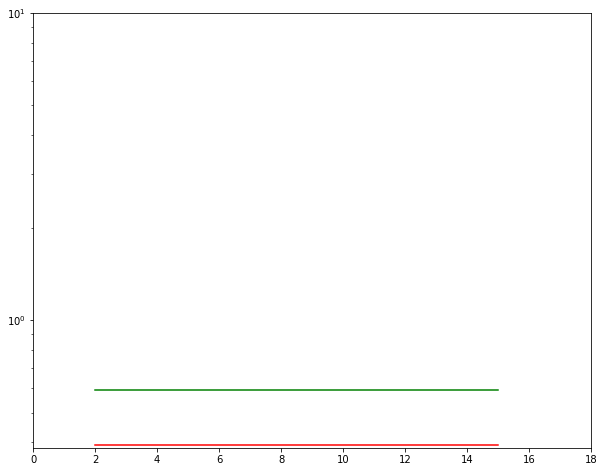

Error Functions (train (red), test (green)):
This plot is error as a function of the number of degrees.


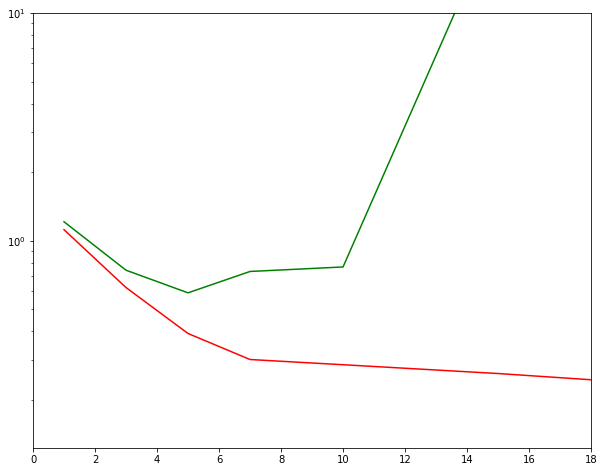

In [244]:
# TODO: Compute and plot cross-validation error for varying number of folds

numDegree = [1, 3, 5, 7, 10, 15, 18]
degreeFunction(numDegree)

numFolds = [2, 3, 4, 5, 6, 10, 12, 15]
foldFunction(numFolds)


    
# (c) The MSE from numFolds = 5 compared to the actual test data produced a more consistent curve for one thing.  
# The divergence region in part 1 is spanning over several degrees and is unclear exactly where it lies in that range.
# I answered degree = 7 for part one because it's in the dead center of the region and the training compared to test error
# is appropriate based on the produced graph.  The training and validation errors from cross validation are also way closer to
# one another at Folds = 5.  Since cross validation utilizes the test data from part 1, this makes sense that the errors are
# closer to one another.

# (d) The best polynomial degree at Folds = 5, seems to be degree = 5 based on the produced graphs.  This is where the validation
# error starts becoming significantly larger than training error.

# So, I sort of got carried away and I think I misunderstood what graphs I was supposed to produce for this step.  I plotted the 
# training and validation errors as a function of degree for all possible number of folds. I fixed this but in plotting all of those
# graphs for every number of folds, I learned that the diminishing returns are seen at around folds = 6.  Anything over this and 
# the graphs start to look extremely simiilar.  So the appropriate number of folds is 6 to prevent needless iterations.  The degree 
# that I found to be the best at Folds = 6 is degree = 5.  This degree is lesser than the degree from question 1.  This is most
# likely because using k-folds cross validation doesn't introduce more complexity, it makes the model complexity easier to 
# visualize through the error.

# (e) Now to actually answer question e, the observed pattern is that the training and validation errors are linear and 
# constant for all number of folds at degree = 5.  Since all of the data is being iterated over and the degree is fixed,
# varying the number of folds does not change the difference in error.  When we plot the error as a function of folds,
# the model complexity is not actually changing.  The feature data is still the same complexity.  Using k-folds cross validation
# just more accurately represents the model complexity.

<hr>

# Statement of Collaboration

It is **mandatory** to include a *Statement of Collaboration* in each submission. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. 

In [ ]:
# I, Christopher Pawlenok, state that all work on this homework, HW03, is mine and mine only.
# No collaborators were used for this homework.